In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install missingno

#### Import bilbliotek

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from scipy.stats import spearmanr

Spis tereści  
1. [Data Processing](#2)  
    1.1 [Wczytanie danych](#21)  
    1.2 [Przekształcenie zmiennej 'loan_status' na wartośc numeryczną](#22)  
    1.3 [Usunięcie pustych kolumn](#23)  
    1.4 [Usunięcie kolumn z tylko jedną uniklaną informacją](#24)  
    1.5 [Usunięcie kolumn zawierających informacje niedostępne w momencie udzielania pożyczki](#25)  
    1.6 [Usunięcie kolumn ze zbędnymi informacjami](#26)  
    1.7 [Uzupełnienie wartości brakujących](#27)  
    1.7.1 [Zmienna 'pub_rec_bankruptcies'](#271)  
    1.7.2 [Zmienne 'mths_since_last_delinq' i 'mths_since_last_record'](#272)  
    1.7.3 [Zmienne 'desc' i title'](#273)  
    1.7.4 [Zmienna "emp_length"](#274)  
    1.7.5 [Zmienna "revol_util". Zastąpienie wartości brakujacych i zamiana zmiennej kategorycznej na numeryczną](#275)  
    1.7.6 [Zmienna "earliest_cr_line"](#276)  
    1.8 [Przekształcenie zmiennych kategorycznych](#28)  
    1.8.1 [Zmienne związane z datą](#281)  
    1.8.2 [Zmienne zawierające dane typu %](#282)  
    1.8.3 [Zmienne kategoryczne kodowane Label Encoding](#283)  
    1.8.4 [Analiza i kodowanie zmiennych grade i sub_grade](#284)  
    1.8.5 [Zmienne FICO](#285)  
    1.8.6 [Zmienna 'home_ownership'](#286)  
    1.8.7 [Zmienna 'term'](#287)  
    1.9 [Zapisanie danych](#29)


In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#### <a name = '2'></a> 1. Data Processing

#### <a name = '21'></a> 1.1 Wczytanie danych

In [4]:
data_row = pd.read_csv('/content/drive/My Drive/Future_Collars/Loan_data.csv')

<ipython-input-4-136a97462f25>:1: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  data_row = pd.read_csv('/content/drive/My Drive/Future_Collars/Loan_data.csv')


In [5]:
data = data_row.copy()

In [6]:
data.shape

(42536, 151)

In [7]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [8]:
# Sprawdzenie typów danych
data.dtypes.value_counts()

,count
float64,120
object,31


*W zbiorze występują dwa typy danych numeryczne i kategoryczne*

#### <a name = '22'></a> 1.2 Przekształcenie zmiennej 'loan_status' na wartośc numeryczną

Zmienna loan_status stanowi zmienną celu i przyjmuje cztery możliwe wartości.  
- Fully Paid,  
- Charged Off,  
- Does not meet the credit policy. Status:Fully Paid,  
- Does not meet the credit policy. Status:Charged :


In [9]:
data['loan_status'].unique()


array(['Fully Paid', 'Charged Off', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [10]:
data['loan_status'].isnull().sum()

1

In [11]:
data = data.dropna(subset = 'loan_status', axis = 0 )

In [12]:
# Zmiana na zmienną numeryczną
loan_status_map = {'Fully Paid': 1,
                   'Charged Off':0,
                   'Does not meet the credit policy. Status:Fully Paid': 1,
                   'Does not meet the credit policy. Status:Charged Off': 0}

data['loan_status'] = data['loan_status'].replace(loan_status_map)

<ipython-input-12-1923211eb1ec>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['loan_status'] = data['loan_status'].replace(loan_status_map)


#### <a name = '23'></a> 1.3 Usunięcie pustych kolumn.
   

In [13]:
len(data)

42535

In [14]:
data_full_null = data.isnull().sum()[data.isnull().sum() == len(data)]

In [15]:
data_full_null

,0
member_id,42535
mths_since_last_major_derog,42535
annual_inc_joint,42535
dti_joint,42535
verification_status_joint,42535
tot_coll_amt,42535
tot_cur_bal,42535
open_acc_6m,42535
open_act_il,42535
open_il_12m,42535


In [16]:
len(data_full_null)

82

In [17]:
data_full_null_list = data_full_null.index.tolist()

*W zbiorze występują 82 kolumny zawierające jedynie puste wartości.*

In [18]:
data = data.drop(columns = data_full_null_list, axis = 1)

In [19]:
data.shape

(42535, 69)

In [20]:
# Pozostałe kolumny z brakami
data.isnull().sum()[data.isnull().sum()>0]

,0
emp_title,2626
emp_length,1112
annual_inc,4
desc,13295
title,13
delinq_2yrs,29
earliest_cr_line,29
inq_last_6mths,29
mths_since_last_delinq,26926
mths_since_last_record,38884


#### <a name = '24'></a>1.4 Usunięcie kolumn z tylko jedną uniklaną informacją

In [21]:
# Lista kolumn w zbiorze danych
col_list  = data.columns.tolist()

In [22]:
# Utworzenie słownika zawierającego ilość unikalnych wartości dla zmiennej oraz określenie jakie unikalne wartości zawiera zmienna.
unique = {}
for col in col_list:
    a = len(data[col].value_counts())
    unique[col] = a


In [23]:
# Lista zmiennych zawierających jedynie unikalne wartości

col_unique_1 = [klucz for klucz, wartosc in unique.items() if wartosc == 1]
col_unique_1

['pymnt_plan',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'chargeoff_within_12_mths',
 'hardship_flag',
 'disbursement_method']

In [24]:
# Sprawdzenie pojedynczych unikalnych wartosci czy nie są skorelowane z wartościami brakującymi - czy Nan coś nie oznacza
for col in col_unique_1:
    print(f'Zmienna "{col}"')
    print(data[col].value_counts())
    print(f'Ilość braków {data[col].isnull().sum()}')
    print('\n')


Zmienna "pymnt_plan"
pymnt_plan
n    42535
Name: count, dtype: int64
Ilość braków 0


Zmienna "initial_list_status"
initial_list_status
f    42535
Name: count, dtype: int64
Ilość braków 0


Zmienna "out_prncp"
out_prncp
0.0    42535
Name: count, dtype: int64
Ilość braków 0


Zmienna "out_prncp_inv"
out_prncp_inv
0.0    42535
Name: count, dtype: int64
Ilość braków 0


Zmienna "collections_12_mths_ex_med"
collections_12_mths_ex_med
0.0    42390
Name: count, dtype: int64
Ilość braków 145


Zmienna "policy_code"
policy_code
1.0    42535
Name: count, dtype: int64
Ilość braków 0


Zmienna "application_type"
application_type
Individual    42535
Name: count, dtype: int64
Ilość braków 0


Zmienna "chargeoff_within_12_mths"
chargeoff_within_12_mths
0.0    42390
Name: count, dtype: int64
Ilość braków 145


Zmienna "hardship_flag"
hardship_flag
N    42535
Name: count, dtype: int64
Ilość braków 0


Zmienna "disbursement_method"
disbursement_method
Cash    42535
Name: count, dtype: int64
Ilość brakó

*Zmienne z pojedynczymi unikalnymi wartościami nie miały lub miały znikomą ilość wartości brakujących, na tyle niewilką że nie miały znaczenia*

In [25]:
data = data.drop(columns = col_unique_1, axis = 1)

In [26]:
data.shape

(42535, 59)

#### <a name = '25'></a> 1.5 Usunięcie kolumn zawierających informacje niedostępne w momencie udzielania pożyczki

In [27]:
# Lista zmiennych zawierających dane z przyszłości
col_future = ['total_pymnt', 'total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','last_fico_range_high','last_fico_range_low','acc_now_delinq','delinq_amnt','debt_settlement_flag',  'next_pymnt_d','debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term']

*Założenie że zmienna 'installment' nie jest zmienną z przyszłości*

In [28]:
len(col_future)

22

In [29]:
data = data.drop(columns= col_future, axis = 1)

In [30]:
data.shape

(42535, 37)

#### <a name = '26'></a> 1.6 Usunięcie kolumn ze zbędnymi informacjami

In [31]:
# Lista kolumn która pozostała w zbiorze danych po redukcji zmiennych.
col_list1 = data.columns.tolist()
len(col_list1)

37

In [32]:
col_list1

['id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'pub_rec_bankruptcies',
 'tax_liens']

In [33]:
unique_1 = {}
for col in col_list1:
    a = len(data[col].value_counts())
    unique_1[col] = a
    print(f'Unikalne wartosci dla kolumny: "{col}"')
    print(data[col].value_counts().head(10))
    print(f'Ilość możliwych unikalnych wartosci dla zmiennej: "{col}" wynosi: {len(data[col].value_counts())}')
    print('\n')

Unikalne wartosci dla kolumny: "id"
id
1077501    1
538025     1
540325     1
540300     1
540270     1
540280     1
540288     1
540234     1
539869     1
540137     1
Name: count, dtype: int64
Ilość możliwych unikalnych wartosci dla zmiennej: "id" wynosi: 42535


Unikalne wartosci dla kolumny: "loan_amnt"
loan_amnt
10000.0    3016
12000.0    2439
5000.0     2260
6000.0     2037
15000.0    2012
20000.0    1724
8000.0     1699
25000.0    1499
4000.0     1230
3000.0     1134
Name: count, dtype: int64
Ilość możliwych unikalnych wartosci dla zmiennej: "loan_amnt" wynosi: 898


Unikalne wartosci dla kolumny: "funded_amnt"
funded_amnt
10000.0    2924
12000.0    2347
5000.0     2247
6000.0     2023
15000.0    1897
8000.0     1686
20000.0    1546
4000.0     1230
25000.0    1224
3000.0     1125
Name: count, dtype: int64
Ilość możliwych unikalnych wartosci dla zmiennej: "funded_amnt" wynosi: 1051


Unikalne wartosci dla kolumny: "funded_amnt_inv"
funded_amnt_inv
5000.0     1369
10000.0    1302


*Kolumny przeznaczone do usunięcia ze względu na niską ważność informacji:  
 "tax_liens" - do usunięcia ze względu na dwie unikalne wartości:  
0.0 - 42429  
1.0 - 1  
"emp_title" - posiada dużo unikalnych i nieustandaryzowanych wartości  
"ID" i "url" - informacje zbędne*



In [34]:
col_l_imp = ['tax_liens','emp_title', 'id', 'url']

In [35]:
data.shape

(42535, 37)

In [36]:
data = data.drop(columns = col_l_imp, axis = 1)

In [37]:
data.shape

(42535, 33)

#### <a name = '27'></a>1.7 Uzupełnienie wartości brakujących
    

*Żeby nie zmienić statystyk, niewielkie braki równiez zostaną zastapione medianą, dominantą lub wartoscia dominująca w kompatybilnej zmiennej.*

In [38]:
null_data = data.isnull().sum().sort_values()


In [39]:
# Kolumny z wartościami brakującymi
null_data_col = null_data[null_data>0]
null_data_col

,0
annual_inc,4
title,13
earliest_cr_line,29
total_acc,29
inq_last_6mths,29
open_acc,29
pub_rec,29
delinq_2yrs,29
revol_util,90
emp_length,1112


In [40]:
# Usunięcie wierszy które występowały w kolumnie annual_inc jako wartości brakujące - 4
data = data.dropna(subset = 'annual_inc', axis =0)

In [41]:
data['annual_inc'].isnull().sum()

0

In [42]:
# Wizualizacja brakujących wartości

In [43]:
# Utworzenie maski wskazującej wiersze z przynajmniej jedną wartością NaN
mask = data.isnull().any(axis=1)

# Utworzenie nowego DataFrame zawierającego tylko wiersze z brakującymi wartościami
data_with_missing = data[mask]



In [44]:
data_with_missing.shape

(41814, 33)

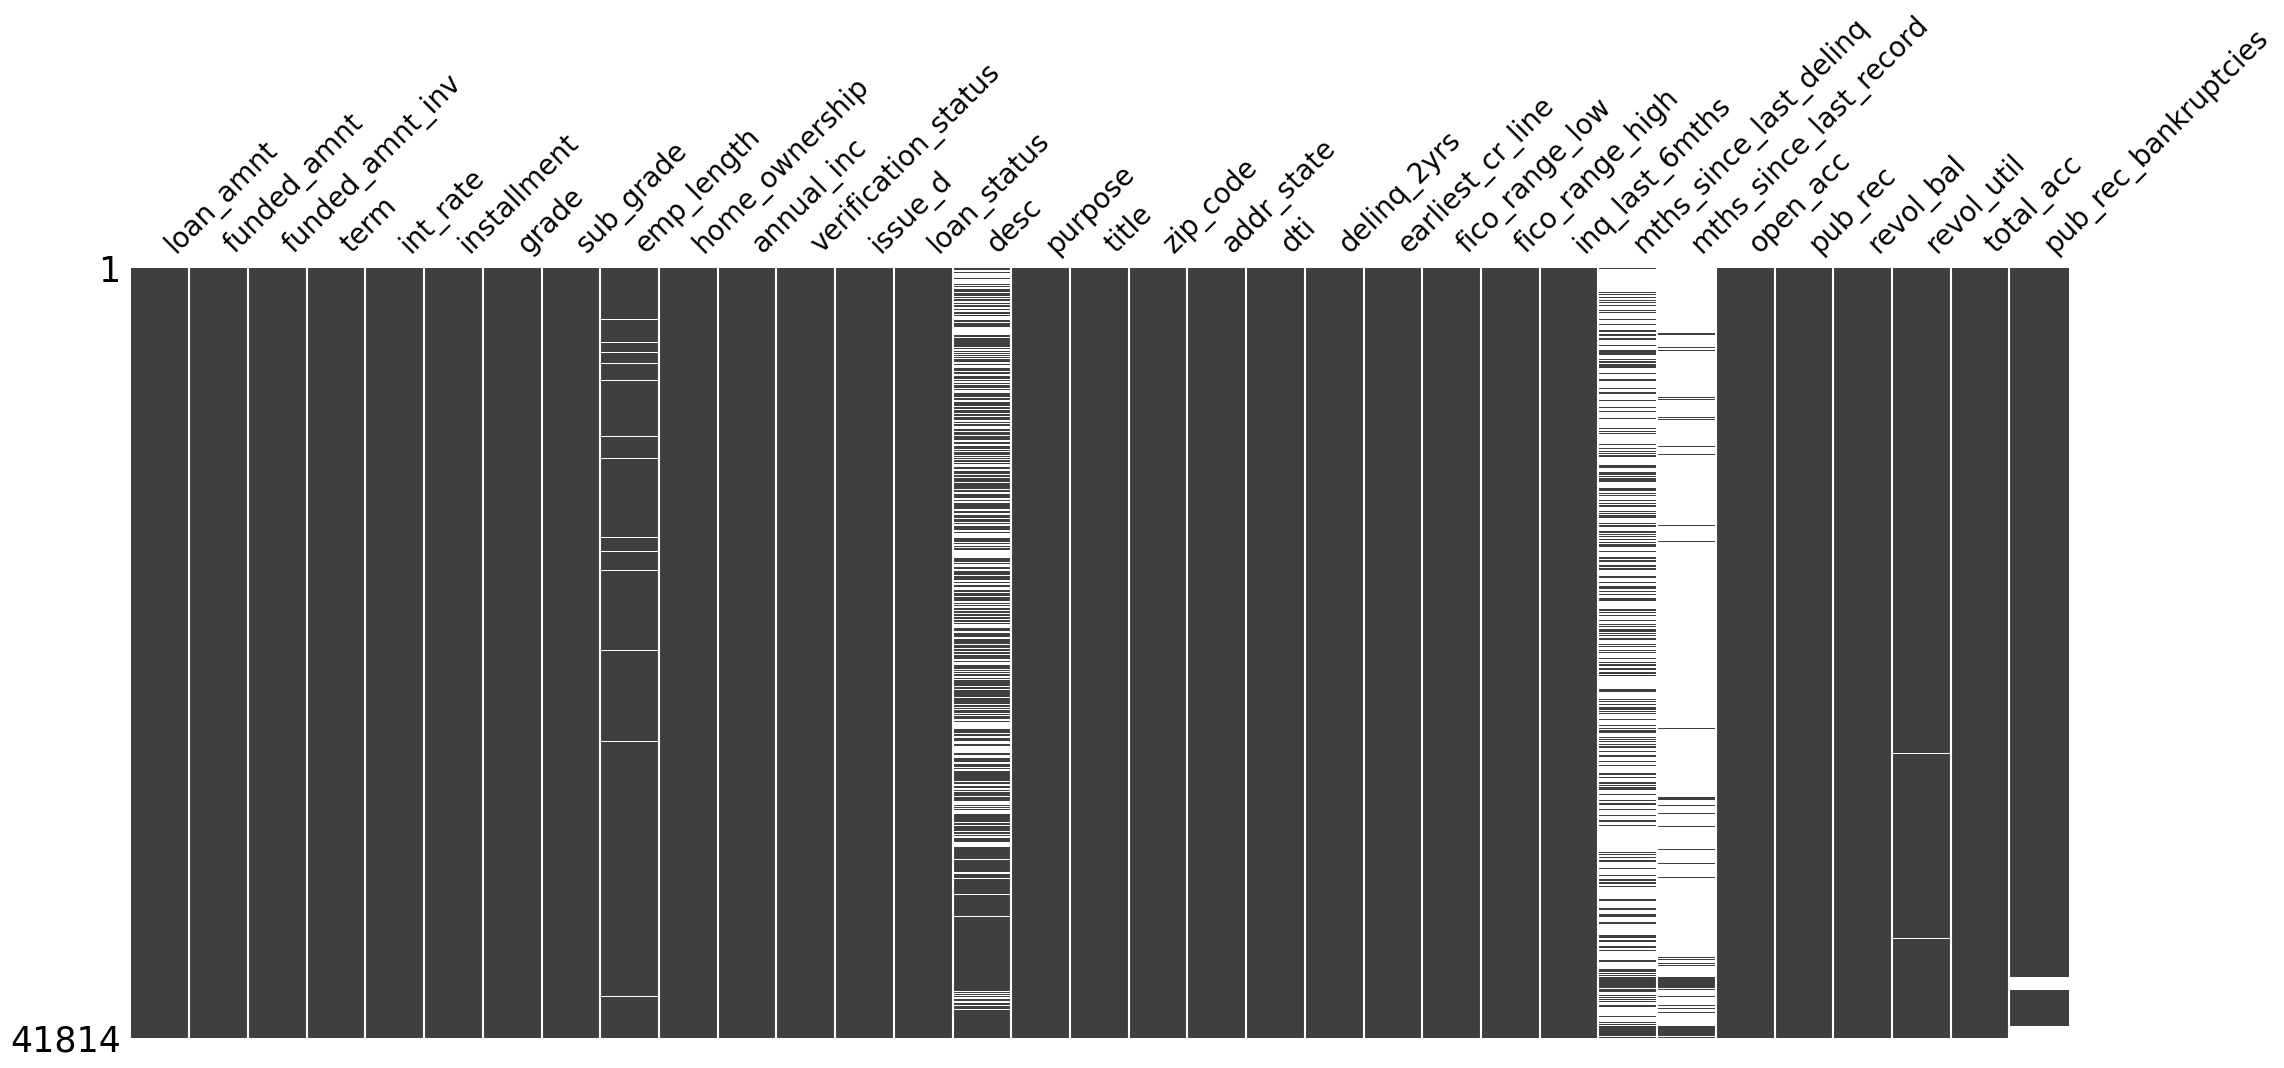

In [45]:
# Wizualizacja danych danych
msno.matrix(data_with_missing, sparkline=False, fontsize=20)
plt.show()

In [46]:
coll_miss = null_data[null_data>0]
coll_mis_list = coll_miss.index.tolist()

In [47]:
#Lista kolumn z brakami
coll_mis_list

['annual_inc',
 'title',
 'earliest_cr_line',
 'total_acc',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'delinq_2yrs',
 'revol_util',
 'emp_length',
 'pub_rec_bankruptcies',
 'desc',
 'mths_since_last_delinq',
 'mths_since_last_record']

In [48]:
#Lista kolumn z danymi numerycznymi
num_columns = data[coll_mis_list].select_dtypes(include=['number']).columns.tolist()


In [49]:
# Zestawienie mediany i wartości dominującej dla zmiennych numerycznych zawierających braki
for col in num_columns:
    print(f'Unikalne wartosci dla kolumny: "{col}"')
    print(data[col].value_counts().sort_index().head())
    print(data[col].value_counts().sort_index().tail())
    print(f'Ilość możliwych unikalnych wartosci dla zmiennej: "{col}" wynosi: {len(data[col].value_counts())}')
    print(f'Ilość brakujących wartości: {data[col].isnull().sum()}')
    print(f'Dominanta: {data[col].mode()[0]}')
    print(f'Mediana: {data[col].median()}')
    print('\n')

Unikalne wartosci dla kolumny: "annual_inc"
annual_inc
1896.0    1
2000.0    1
3300.0    1
3500.0    1
3600.0    1
Name: count, dtype: int64
annual_inc
1782000.0    1
1900000.0    1
2039784.0    1
3900000.0    1
6000000.0    1
Name: count, dtype: int64
Ilość możliwych unikalnych wartosci dla zmiennej: "annual_inc" wynosi: 5597
Ilość brakujących wartości: 0
Dominanta: 60000.0
Mediana: 59000.0


Unikalne wartosci dla kolumny: "total_acc"
total_acc
1.0     21
2.0     41
3.0    238
4.0    486
5.0    622
Name: count, dtype: int64
total_acc
79.0    2
80.0    1
81.0    1
87.0    1
90.0    1
Name: count, dtype: int64
Ilość możliwych unikalnych wartosci dla zmiennej: "total_acc" wynosi: 83
Ilość brakujących wartości: 25
Dominanta: 15.0
Mediana: 20.0


Unikalne wartosci dla kolumny: "inq_last_6mths"
inq_last_6mths
0.0    19657
1.0    11247
2.0     5987
3.0     3182
4.0     1056
Name: count, dtype: int64
inq_last_6mths
27.0    1
28.0    1
31.0    1
32.0    1
33.0    1
Name: count, dtype: int64
Il

In [50]:
# Lista kolumn z danymi kategorycznymi
cat_columns = data[coll_mis_list].select_dtypes(exclude=['number']).columns.tolist()

In [51]:
# Zestawienie wartości dominującej dla zmiennych kategorycznych
for col in cat_columns:
    print(f'Unikalne wartosci dla kolumny: "{col}"')
    print(data[col].value_counts().sort_index().head())
    print(data[col].value_counts().sort_index().tail())
    print(f'Ilość możliwych unikalnych wartosci dla zmiennej: "{col}" wynosi: {len(data[col].value_counts())}')
    print(f'Ilość brakujących wartości: {data[col].isnull().sum()}')
    print(f'Dominanta: {data[col].mode()[0]}')
    print('\n')

Unikalne wartosci dla kolumny: "title"
title
\tdebt_consolidation    2
   HITEK  EQUIPMENT     1
 APRILIA TUONO 1000R    1
 Auto                   1
 Auto Loan              1
Name: count, dtype: int64
title
zack                         2
zandercade                   1
zipcar                       1
zxcvb                        1
îîMY FIRST CAR îî    1
Name: count, dtype: int64
Ilość możliwych unikalnych wartosci dla zmiennej: "title" wynosi: 21263
Ilość brakujących wartości: 13
Dominanta: Debt Consolidation


Unikalne wartosci dla kolumny: "earliest_cr_line"
earliest_cr_line
Apr-1964    3
Apr-1966    1
Apr-1967    4
Apr-1968    1
Apr-1969    1
Name: count, dtype: int64
earliest_cr_line
Sep-2004    221
Sep-2005    162
Sep-2006    150
Sep-2007     63
Sep-2008      8
Name: count, dtype: int64
Ilość możliwych unikalnych wartosci dla zmiennej: "earliest_cr_line" wynosi: 530
Ilość brakujących wartości: 25
Dominanta: Oct-1999


Unikalne wartosci dla kolumny: "revol_util"
revol_util
0%

#### <a name = '271'></a>1.7.1 Zmienna 'pub_rec_bankruptcies'

*Braki w zmiennej 'pub_rec_bankruptcies' koreluja sie z wystapieniem informacji w kolumnie 'mths_since_last_delinq'. Kolumny te są logicznie ze soba powiązane. Dlatego braki w kolumnie 'pub_rec_bankruptcies'  zostanią zastąpione zaleznie od wartości z kolumny 'mths_since_last_delinq'*

<Axes: xlabel='mths_since_last_delinq', ylabel='pub_rec_bankruptcies'>

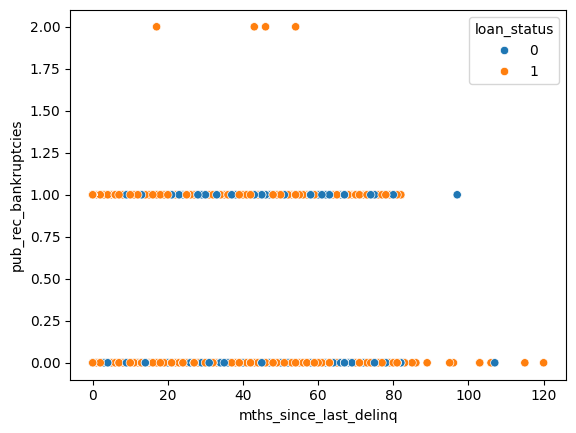

In [52]:
sns.scatterplot(data = data, x = 'mths_since_last_delinq', y = 'pub_rec_bankruptcies', hue ='loan_status')

In [53]:
data[data['mths_since_last_delinq']==0]['pub_rec_bankruptcies'].value_counts()

,count
pub_rec_bankruptcies,
1.0,24
0.0,2


In [54]:
data[data['pub_rec_bankruptcies']==0]['mths_since_last_delinq'].value_counts().sort_index()

,count
mths_since_last_delinq,
0.0,2
1.0,29
2.0,105
3.0,152
4.0,151
5.0,151
6.0,190
7.0,183
8.0,168


In [55]:
data['pub_rec_bankruptcies'].value_counts()


,count
pub_rec_bankruptcies,
0.0,39316
1.0,1846
2.0,8


In [56]:
data[data['pub_rec_bankruptcies'].isnull()]['loan_status'].value_counts()


,count
loan_status,
1,1027
0,334


In [57]:
data[data['pub_rec_bankruptcies'].notnull()]['loan_status'].value_counts()

,count
loan_status,
1,35073
0,6097


In [58]:
data['mths_since_last_delinq'].value_counts()

,count
mths_since_last_delinq,
0.0,821
30.0,270
19.0,266
23.0,266
15.0,263
24.0,262
18.0,252
38.0,251
20.0,249


In [59]:
# Tworzenie nowego df aby ocenic jakim wartościom w mths_since_last_delinq odpowiadaja najczesciej jakie wartosci z pub_rec_bankruptcies
data_grouped = data[['pub_rec_bankruptcies', 'mths_since_last_delinq']]

In [60]:
# Sprawdzenie częstości wystepowania wartości w kolumnie mths_since_last_delinq gdy pub_rec_bankruptcies jest pusta
# do sprawdzenia czy wartości brakujace dobrze sie uzupełniły
null_1 = data_grouped[data_grouped['pub_rec_bankruptcies'].isna()]
null_1['mths_since_last_delinq'].value_counts().sort_index()

,count
mths_since_last_delinq,
0.0,795
1.0,3
2.0,7
3.0,1
4.0,7
5.0,11
6.0,11
7.0,7
8.0,10


In [61]:
# Usuniecie wierszy z nan dla kolumny pub_rec_bankruptcies, żeby nie przeszkadzały przy zliczaniu
data_grouped = data_grouped.dropna(subset = 'pub_rec_bankruptcies' , axis = 0)

In [62]:
# Najczesciej wystepująca wartość w kolumnie pub_rec_bankruptcies dla poszczególnych wartosci w kolumnie mths_since_last_delinq
mode_series = data_grouped.groupby('mths_since_last_delinq')['pub_rec_bankruptcies'].agg(pd.Series.mode)


In [63]:
mode_series

,pub_rec_bankruptcies
mths_since_last_delinq,
0.0,1.0
1.0,0.0
2.0,0.0
3.0,0.0
4.0,0.0
5.0,0.0
6.0,0.0
7.0,0.0
8.0,0.0


*1 wystepuje tylko dla 0 i 97, dla 97 wynika  z małej ilości danych i prawdopodobnie stanowi błąd i nie wystepuje w uzupełnianych brakach*

In [64]:
# Przekształcenie na słownik
mode_dict = mode_series.to_dict()


In [65]:
# Użycie mapy do stworzenia serii z wartościami do wypełnienia NaN
fill_values = data['mths_since_last_delinq'].map(mode_dict)

In [66]:

data['pub_rec_bankruptcies'].value_counts()

,count
pub_rec_bankruptcies,
0.0,39316
1.0,1846
2.0,8


In [67]:
# Wypełnianie NaN wartościami z mapy
data['pub_rec_bankruptcies'] = data['pub_rec_bankruptcies'].fillna(fill_values)

In [68]:

data['pub_rec_bankruptcies'].value_counts()

,count
pub_rec_bankruptcies,
0.0,39847
1.0,2641
2.0,8


*Wartości brakujace w kolumnie pub_rec_bankruptcies zostały uzupełnione następująco - 531 wartością 0  i 795 - 1. Co jest logiczne ponieważ wartości 1   - Liczba bankructw zanotowanych w rejestrach publicznych wystepowały w przypaku klientów  dla których liczba miesięcy od ostatniego przeterminowania płatnosci była mniejesza niż 1 miesiac*

In [69]:
data['pub_rec_bankruptcies'].isnull().sum()

35

*Pozostaje jeszcze 35 braków z powodu wartosci Nan w kolumnie mths_since_last_delinq. Zostana zastąpione wartościa dominujacą - 0*

In [70]:
data['pub_rec_bankruptcies'] = data['pub_rec_bankruptcies'].fillna(0)

In [71]:
num_columns_1 = ['delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc']


In [72]:
for col in num_columns_1:
    data[col] = data[col].fillna(data[col].median())

#### <a name = '272'></a>1.7.2 Zmienne 'mths_since_last_delinq' i 'mths_since_last_record'

*mths_since_last_record:  
Zmienna odnosi się do liczby miesięcy, które upłynęły od ostatniego wpisu w publicznych rejestrach, które mogą obejmować wydarzenia takie jak bankructwo, sądowe nakazy zapłaty, i inne poważne zdarzenia prawne. Wpisy te zwykle pochodzą z sądów lub innych instytucji rządowych i są dostępne publicznie. Wpisy te zazwyczaj mają poważniejszy charakter i mogą wskazywać na istotne trudności finansowe. - Nan zastąpić wartoscia maksymalną ponieważ moze oznaczać że osoba nie została odnotowana  
mths_since_last_delinq:  
Zmienna mierzy liczbę miesięcy od ostatniego przypadku zaległości w płatnościach, czyli sytuacji, kiedy pożyczkobiorca spóźnił się z płatnością o ponad 30 dni. Zaległości te nie muszą być odnotowane w publicznych rejestrach, ale są częścią historii kredytowej pożyczkobiorcy przechowywanej przez biura kredytowe. Zaległości te są mniej poważne niż te odnotowane w publicznych rejestrach, ale mogą sygnalizować problemy z zarządzaniem finansami osobistymi.- nan zastąpic wartością większą od maksymalnej ponieważ oznacza że klient nie zalegał ze spłatą.  
Zmienne te do celów analizy zostaną uzupełnione wysoką wartością a docelowo  przekształcone zostaną na zmienne kategoryczne lub binarne*  

In [73]:
data['mths_since_last_record'] = data['mths_since_last_record'].fillna(300)

In [74]:
data['mths_since_last_delinq'] = data['mths_since_last_delinq'].fillna(300)

#### <a name = '273'></a>1.7.3 Zmienne 'desc' i title'

*Zmienne 'desc' i title' są zmiennymi opisującymi odpowiednio cel kredytu lub tytuł, sa dowolne, zależne od klienta dlatego wartości brakujące zostaną zastąpione literą 0. Nie stanowią wartości pod wzgledem analizy zmiennych ale zostaną docelowo użyte w inżynierii danych.*  

In [75]:
data['desc'] = data['desc'].fillna('0')

In [76]:
data['title'] = data['desc'].fillna('0')

#### <a name = '274'></a>1.7.4 Zmienna "emp_length"

*W zmiennej kategorycznej "emp_length" wartość brakująca może stanowić pewną informację dlatego zostanie zastąpiony wartością tekstową 'brak'*


In [77]:
data["emp_length"] = data["emp_length"].fillna('brak')

#### <a name = '275'></a>1.7.5 Zmienna "revol_util". Zastąpienie wartości brakujacych i zamiana zmiennej kategorycznej na numeryczną

*Analiza rozkładu zminnej "revol_util" zaleznie od wartości targetu*

In [78]:
data_0 = data[data["loan_status"] == 0]["revol_util"]
data_1 = data[data['loan_status'] == 1]["revol_util"]

In [79]:
data_0 = data_0.dropna(how = 'all', axis = 0)
data_1 = data_1.dropna(how = 'all', axis = 0)

In [80]:
data_0 = data_0.str.replace('%', '').astype(float)
data_0.head()

,revol_util
1,9.4
8,32.6
9,36.5
12,91.7
14,55.5


In [81]:
data_1 = data_1.str.replace('%', '').astype(float)
data_1.head()

,revol_util
0,83.7
2,98.5
3,21.0
4,53.9
5,28.3


<Axes: xlabel='revol_util', ylabel='Count'>

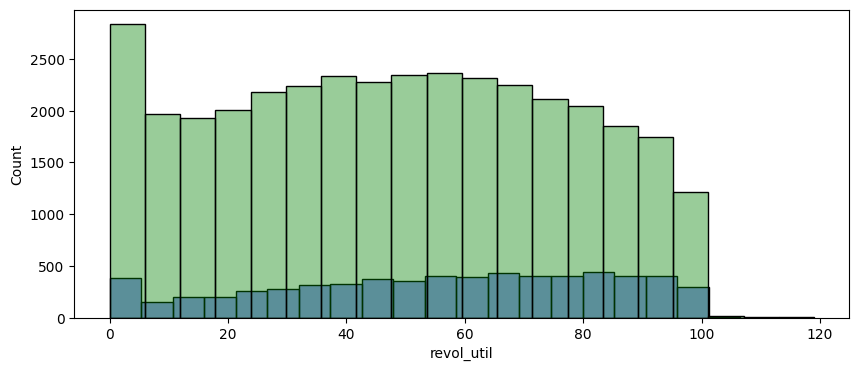

In [82]:
plt.figure(figsize=(10, 4))

sns.histplot(data=data_0,  bins=20, kde=False, color='blue', alpha=0.4,  label='Target 0')
sns.histplot(data=data_1,  bins=20, kde=False, color='green', alpha=0.4,  label='Target 1')
#set_title('Rozkład wartości dla obu targetów dla ')
#set_xlabel('Wartość ')
#set_ylabel('Liczba obserwacji')
#legend()

Zamiana zmiennej na numeryczną

In [83]:
data['revol_util'] = data['revol_util'].str.replace('%', '').astype(float)
data['revol_util'].head()

,revol_util
0,83.7
1,9.4
2,98.5
3,21.0
4,53.9


In [84]:
# Mediana dla revol_util
mediana_revol_util = data['revol_util'].median()
mediana_revol_util

49.7

In [85]:
# Dominanta dla revol_util
mode_revol_util_mod = data['revol_util'].mode()[0]
mode_revol_util_mod

0.0

*Mediana znacząco różni sie od dominanty ale ze wzgledu na gorszy przypadek wartosci zerowe zostaną zastąpione medianą a nie dominantą*

In [86]:
data['revol_util'] = data['revol_util'].fillna(49.7)

In [87]:
data.isna().sum()

,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,0
home_ownership,0


#### <a name = '276'></a>1.7.6 Zmienna "earliest_cr_line".

*Zmienna "earliest_cr_line" zostanie zastąpiona dominantą*

In [88]:
data["earliest_cr_line"] = data["earliest_cr_line"].fillna('Oct-1999')

#### <a name = '28'></a>1.8 Przekształcenie zmiennych kategorycznych
   

*Tylko te zmienne kategoryczne które zachowaly naturalny porządek zostały przekształcone na zmienne numeryczne*

In [89]:
# Lista zmiennych kategorycznych
cat_columns = data.select_dtypes(exclude=['number']).columns.tolist()
cat_columns

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line']

In [90]:
# Przegląd wartości unikalnych dla zmiennych kategorycznych
for col in cat_columns:
    print(f'Zmienna "{col}"')
    print(data[col].value_counts().head(10))
    print(f'Ilość braków {data[col].isnull().sum()}')
    print('\n')

Zmienna "term"
term
36 months    31530
60 months    11001
Name: count, dtype: int64
Ilość braków 0


Zmienna "int_rate"
int_rate
10.99%    970
11.49%    837
13.49%    832
 7.51%    787
 7.88%    742
 7.49%    656
11.71%    609
 9.99%    607
 7.90%    582
 5.42%    573
Name: count, dtype: int64
Ilość braków 0


Zmienna "grade"
grade
B    12389
A    10179
C     8740
D     6016
E     3394
F     1301
G      512
Name: count, dtype: int64
Ilość braków 0


Zmienna "sub_grade"
sub_grade
B3    2997
A4    2905
B5    2807
A5    2792
B4    2590
C1    2264
C2    2157
B2    2113
B1    1882
A3    1821
Name: count, dtype: int64
Ilość braków 0


Zmienna "emp_length"
emp_length
10+ years    9369
< 1 year     5058
2 years      4743
3 years      4364
4 years      3649
1 year       3595
5 years      3458
6 years      2375
7 years      1875
8 years      1592
Name: count, dtype: int64
Ilość braków 0


Zmienna "home_ownership"
home_ownership
RENT        20181
MORTGAGE    18959
OWN          3251
OTHER         

Zmienne zakwalifikowane do przekształcenia:  
"int_rate"  
"grade" - w celu sparwdzenia korelacji, dlatego utworzona zostaje nowa zmienna
"sub_grade"  
"issue_d"  
"earliest_cr_line"  
"fico_high_low" oraz utworzona nowa zmienna fico cat  
"term" - nowa zmienna term_num w celu oznaczenia korelacji
"emp_lenght" - w celu analizy i korelacji  


#### <a name = '281'></a> 1.8.1 Zmienne związane z datą

In [91]:
columns_date_list = ["issue_d", "earliest_cr_line"]

In [92]:
data[["issue_d", "earliest_cr_line"]].head()

,issue_d,earliest_cr_line
0,Dec-2011,Jan-1985
1,Dec-2011,Apr-1999
2,Dec-2011,Nov-2001
3,Dec-2011,Feb-1996
4,Dec-2011,Jan-1996


In [93]:
data["issue_d"] = pd.to_datetime(data["issue_d"], format = '%b-%Y')

In [94]:
data["earliest_cr_line"] = pd.to_datetime(data["earliest_cr_line"], format = '%b-%Y')

In [95]:
data[["issue_d", "earliest_cr_line"]].head()

,issue_d,earliest_cr_line
0,2011-12-01,1985-01-01
1,2011-12-01,1999-04-01
2,2011-12-01,2001-11-01
3,2011-12-01,1996-02-01
4,2011-12-01,1996-01-01


In [96]:
data[["issue_d", "earliest_cr_line"]].dtypes

,0
issue_d,datetime64[ns]
earliest_cr_line,datetime64[ns]


#### <a name = '282'></a>1.8.2 Zmienne zawierające dane typu %

In [97]:
# Zmienna "int_rate"
data['int_rate'].str.strip()
data['int_rate'] = data['int_rate'].str.replace('%', '')
data['int_rate'] = data['int_rate'].astype(float).round(1)

data['int_rate'].head()

,int_rate
0,10.6
1,15.3
2,16.0
3,13.5
4,12.7


In [98]:
data['int_rate'].dtypes

dtype('float64')

#### <a name = '283'></a>1.8.3 Zmienne kategoryczne kodowane Label Encoding

In [99]:
# Zmienna przekształcona w numeryczną tylko do celów wizualizacyjnych
data["emp_length"].unique() # brak białych znaków

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', 'brak'],
      dtype=object)

In [100]:
data["emp_length_num"] = data["emp_length"].str.replace(' years', '')

In [101]:
data["emp_length_num"] = data["emp_length_num"].replace({'10+': 10, '< 1 year': 0, '1 year': 1, 'brak':20})

In [102]:
data["emp_length_num"].value_counts().sort_values(ascending=False)

,count
emp_length_num,
10,9369
0,5058
2,4743
3,4364
4,3649
1,3595
5,3458
6,2375
7,1875


In [103]:
data["emp_length_num"] = data["emp_length_num"].astype(int)

#### <a name = '284'></a>12.8.4 Analiza i kodowanie zmiennych grade i sub_grade

*Zmienne grade i sub_grade powinny byc ze sobą zwiazane ponieważ sub_grade jest bardziej szczegółową wersją grade.
Dodatkowo zmienne jako nieliczne wśród  zmienneych kategorycznych w analizowanym zbiorze zachowują naturalny porządek (od A stanowiącego najmniejszy wskaźnik ryzyka
do G stanowiącego największy wskaźnik ryzyka) ich wartości w naturalny sposób moga korelowac się z pozstałymi zmiennymi numerycznymi. Stąd zmiana na wartosci od 0 - 7 będzie proporcjonalna z wysokościa ryzyka*

In [104]:
# Sprawdzenie czy wartości w zmiennej grade i sub_grade są spójne
data_grade = data[['sub_grade', 'grade']]
data_grade.head()

,sub_grade,grade
0,B2,B
1,C4,C
2,C5,C
3,C1,C
4,B5,B


In [105]:
# Ekstrakcja części nienumerycznej ze zmiennej sub_grade
data1 = data.copy()
data1['sub_grade_letter'] = data['sub_grade'].str.extract('([A-G])')


In [106]:
data1['sub_grade_letter'].head()

,sub_grade_letter
0,B
1,C
2,C
3,C
4,B


In [107]:
#Porównanie
data1['match'] = data1['grade'] == data1['sub_grade_letter']

In [108]:
data1['match'].value_counts()

,count
match,
True,42531


*Wartości w kolumnie sub_grade są zbieżne*

In [109]:
encoder = LabelEncoder()

In [110]:
data['grade_num'] = encoder.fit_transform(data[['grade']])
mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [111]:
original_values_verification_status = encoder.inverse_transform(data['grade_num'])
original_values_verification_status_pd = pd.DataFrame(original_values_verification_status)

print('Oryginalne wartości etykiet dla zmiennej "grade"')
print(original_values_verification_status_pd.value_counts())
print(data['grade_num'].value_counts())

Oryginalne wartości etykiet dla zmiennej "grade"
0
B    12389
A    10179
C     8740
D     6016
E     3394
F     1301
G      512
Name: count, dtype: int64
grade_num
1    12389
0    10179
2     8740
3     6016
4     3394
5     1301
6      512
Name: count, dtype: int64


In [112]:
#Kolumna sub_grade przekształcona zostanie na numeryczną poprzez mapowanie - spójne z wartościami kolumny grade
garde_map  ={'A':'0.', 'B': '1.', 'C': '2.', 'D':'3.', 'E': '4.', 'F': '5.', 'G': '6.'}


In [113]:
data['grade_letter'] = data['sub_grade'].str[0]
data['grade_number'] = data['sub_grade'].str[1]

In [114]:
data['grade_letter'] = data['grade_letter'].replace(garde_map)

In [115]:
data['sub_grade'] = data['grade_letter'] + data['grade_number']

In [116]:
data['sub_grade'] = data['sub_grade'].astype(float)

In [117]:
data['sub_grade'].head()

,sub_grade
0,1.2
1,2.4
2,2.5
3,2.1
4,1.5


In [118]:
data = data.drop(columns = ['grade_letter','grade_number'], axis = 1)

In [119]:
columns = data.select_dtypes(exclude=['number']).columns.tolist()
columns

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line']

In [120]:
data.dtypes

,0
loan_amnt,float64
funded_amnt,float64
funded_amnt_inv,float64
term,object
int_rate,float64
installment,float64
grade,object
sub_grade,float64
emp_length,object
home_ownership,object


#### <a name = '285'></a>1.8.5 Zmienne FICO

In [121]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'desc',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies', 'emp_length_num', 'grade_num'],
      dtype='object')

In [122]:
# Przekształcenie na jedna kolumnę
data['fico_value'] = (data['fico_range_low'] + data['fico_range_high'])/2

In [123]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'desc',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies', 'emp_length_num', 'grade_num', 'fico_value'],
      dtype='object')

In [124]:
data  = data.drop(columns =['fico_range_low', 'fico_range_high'], axis = 1)

In [125]:
# Utworzenie kolumny FICO_category
data['fico_category'] = None

for index, row in data.iterrows():
    score = row['fico_value']
    if score < 580:
        category = 'Poor'
    elif 580 <= score <= 669:
        category = 'Fair'
    elif 670 <= score <= 739:
        category = 'Good'
    elif 740 <= score <= 779:
        category = 'Very_good'
    else:
        category = 'Exceptional'

    data.at[index, 'fico_category'] = category


In [126]:
data[['fico_category', 'fico_value' ]].head()

,fico_category,fico_value
0,Good,737.0
1,Very_good,742.0
2,Good,737.0
3,Good,692.0
4,Good,697.0


#### <a name = '286'></a>1.8.6 Zmienna 'home_ownership'

In [127]:
data['home_ownership'] = data['home_ownership'].replace({'NONE': 'OTHER'})

#### <a name = '287'></a>1.8.7 Zmienna 'term'

In [128]:
data['term_numeric'] = data['term'].str.extract('(\d+)').astype(int)

#### <a name = '29'></a>1.9 Zapisanie danych

In [129]:
data.to_csv('/content/drive/My Drive/Future_Collars/Loan_data_obrobka_danych.csv', index=False)